In [1]:
## CLAHE Preprocessing

In [134]:
import cv2
import os
from pathlib import Path
import pandas as pd
import numpy as np

In [135]:
dataset = 'ODIR5K'

notebook_dir = Path.cwd()
artifacts = notebook_dir.resolve().parents[1] / 'shared' / 'artifacts'
odir_processed_dir = artifacts / 'processed' / dataset
odir_raw_dir = artifacts / 'raw' / dataset

print(notebook_dir)
print(artifacts)
print(odir_processed_dir)
print(odir_raw_dir)

/Users/ismasadou/Documents/kuude/jamu-platform/model-development/research
/Users/ismasadou/Documents/kuude/jamu-platform/shared/artifacts
/Users/ismasadou/Documents/kuude/jamu-platform/shared/artifacts/processed/ODIR5K
/Users/ismasadou/Documents/kuude/jamu-platform/shared/artifacts/raw/ODIR5K


In [136]:
metadata_csv_path = odir_processed_dir / 'metadata.csv'
df_metadata_pp = pd.read_csv(metadata_csv_path)
df_metadata_pp_safe = df_metadata_pp.copy()

In [137]:
df_metadata_pp.head()

ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0   0           69      Female  0_left.jpg  0_right.jpg   
1   1           57        Male  1_left.jpg  1_right.jpg   
2   2           42        Male  2_left.jpg  2_right.jpg   
3   4           53        Male  4_left.jpg  4_right.jpg   
4   5           50      Female  5_left.jpg  5_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                        macular epiretinal membrane   
4             moderate non proliferative retinopathy   

                Right-Diagnostic Keywords  N  D  G  ...  H  M  O  \
0                           normal fundus  0  0  0  ...  0  0  0   
1                           normal fundus  1  0  0  ...  0  0  0   
2  moderate non proliferative retinopathy  0  1  0  ...  0  0  1   
3       mild nonproliferative retinopathy  0  1  0  ...  0  0  1   
4  moderate non proliferative retinopathy  0  1  0  ...  0  0  0   

                                            filepath  labels  \
0  ../input/ocular-disease-recognition-odir5k/ODI...   ['N']   
1  ../input/ocular-disease-recognition-odir5k/ODI...   ['N']   
2  ../input/ocular-disease-recognition-odir5k/ODI...   ['D']   
3  ../input/ocular-disease-recognition-odir5k/ODI...   ['D']   
4  ../input/ocular-disease-recognition-odir5k/ODI...   ['D']   

                     target     filename             parsed_target  \
0  [1, 0, 0, 0, 0, 0, 0, 0]  0_right.jpg  [1, 0, 0, 0, 0, 0, 0, 0]   
1  [1, 0, 0, 0, 0, 0, 0, 0]  1_right.jpg  [1, 0, 0, 0, 0, 0, 0, 0]   
2  [0, 1, 0, 0, 0, 0, 0, 0]  2_right.jpg  [0, 1, 0, 0, 0, 0, 0, 0]   
3  [0, 1, 0, 0, 0, 0, 0, 0]  4_right.jpg  [0, 1, 0, 0, 0, 0, 0, 0]   
4  [0, 1, 0, 0, 0, 0, 0, 0]  5_right.jpg  [0, 1, 0, 0, 0, 0, 0, 0]   

  parsed_gender age_group  
0             1     60-69  
1             0     50-59  
2             0     40-49  
3             0     50-59  
4             1     40-49  

[5 rows x 22 columns]

In [138]:
image_pp_dir = odir_raw_dir / 'preprocessed_images'
df_metadata_pp['filepath'] = df_metadata_pp['filename'].apply(lambda x: 'image_dir/' + str(x))

columns_to_drop = [
    'Left-Fundus', 
    'Right-Fundus',
    'target', 
    'Patient Sex',
    'filepath'
]
df_metadata = df_metadata_pp.drop(columns=columns_to_drop)

columns_to_rename = {
    'ID':'id',
    'parsed_gender': 'gender', 
    'Patient Age':'age', 
    'parsed_target': 'target',
    'Left-Diagnostic Keywords':'l_diagnostic_keywords',
    'Right-Diagnostic Keywords':'r_diagnostic_keywords',
    'N':'normal',
    'D':'diabetes',
    'G':'glaucoma',
    'C':'cataract',
    'A':'amd',
    'H':'hypertension',
    'M':'myopia',
    'O':'other'
}
df_metadata = df_metadata.rename(columns=columns_to_rename)

In [139]:
reordered_columns = ['id','age_group','age', 'gender','l_diagnostic_keywords','r_diagnostic_keywords','normal','diabetes','glaucoma','cataract','amd','hypertension','myopia','other','labels','target','filename']
df_metadata = df_metadata.reindex(columns=reordered_columns)

In [140]:
df_metadata.to_csv('odir-5k-parsed.csv', index=False)
df_metadata

id age_group  age  gender  \
0        0     60-69   69       1   
1        1     50-59   57       0   
2        2     40-49   42       0   
3        4     50-59   53       0   
4        5     40-49   50       1   
...    ...       ...  ...     ...   
6387  4686     60-69   63       0   
6388  4688     40-49   42       0   
6389  4689     50-59   54       0   
6390  4690     50-59   57       0   
6391  4784     50-59   58       0   

                                  l_diagnostic_keywords  \
0                                              cataract   
1                                         normal fundus   
2     laser spot，moderate non proliferative retinopathy   
3                           macular epiretinal membrane   
4                moderate non proliferative retinopathy   
...                                                 ...   
6387                severe nonproliferative retinopathy   
6388             moderate non proliferative retinopathy   
6389                  mild nonproliferative retinopathy   
6390                  mild nonproliferative retinopathy   
6391  hypertensive retinopathy，age-related macular d...   

                                  r_diagnostic_keywords  normal  diabetes  \
0                                         normal fundus       0         0   
1                                         normal fundus       1         0   
2                moderate non proliferative retinopathy       0         1   
3                     mild nonproliferative retinopathy       0         1   
4                moderate non proliferative retinopathy       0         1   
...                                                 ...     ...       ...   
6387                 proliferative diabetic retinopathy       0         1   
6388             moderate non proliferative retinopathy       0         1   
6389                                      normal fundus       0         1   
6390                  mild nonproliferative retinopathy       0         1   
6391  hypertensive retinopathy，age-related macular d...       0         0   

      glaucoma  cataract  amd  hypertension  myopia  other labels  \
0            0         1    0             0       0      0  ['N']   
1            0         0    0             0       0      0  ['N']   
2            0         0    0             0       0      1  ['D']   
3            0         0    0             0       0      1  ['D']   
4            0         0    0             0       0      0  ['D']   
...        ...       ...  ...           ...     ...    ...    ...   
6387         0         0    0             0       0      0  ['D']   
6388         0         0    0             0       0      0  ['D']   
6389         0         0    0             0       0      0  ['D']   
6390         0         0    0             0       0      0  ['D']   
6391         0         0    1             1       0      0  ['H']   

                        target       filename  
0     [1, 0, 0, 0, 0, 0, 0, 0]    0_right.jpg  
1     [1, 0, 0, 0, 0, 0, 0, 0]    1_right.jpg  
2     [0, 1, 0, 0, 0, 0, 0, 0]    2_right.jpg  
3     [0, 1, 0, 0, 0, 0, 0, 0]    4_right.jpg  
4     [0, 1, 0, 0, 0, 0, 0, 0]    5_right.jpg  
...                        ...            ...  
6387  [0, 1, 0, 0, 0, 0, 0, 0]  4686_left.jpg  
6388  [0, 1, 0, 0, 0, 0, 0, 0]  4688_left.jpg  
6389  [0, 1, 0, 0, 0, 0, 0, 0]  4689_left.jpg  
6390  [0, 1, 0, 0, 0, 0, 0, 0]  4690_left.jpg  
6391  [0, 0, 0, 0, 0, 1, 0, 0]  4784_left.jpg  

[6392 rows x 17 columns]

In [78]:
######## Cataract

In [79]:
print(df_metadata[df_metadata.normal==1].shape)
print(df_metadata.loc[(df_metadata.cataract==1)].shape)
print(df_metadata.loc[(df_metadata.cataract==0)].shape)
print(df_metadata[df_metadata.normal==1].shape)

(2101, 17)
(402, 17)
(5990, 17)
(2101, 17)


In [80]:
df_metadata[df_metadata.cataract==1]['l_diagnostic_keywords'].value_counts()

l_diagnostic_keywords
cataract                                                                   268
normal fundus                                                               48
cataract，lens dust                                                          12
moderate non proliferative retinopathy                                      12
mild nonproliferative retinopathy                                           10
refractive media opacity                                                     6
normal fundus，lens dust                                                      6
cataract，moderate non proliferative retinopathy                              6
severe proliferative diabetic retinopathy                                    4
cataract，mild nonproliferative retinopathy                                   4
lens dust，normal fundus                                                      3
lens dust，cataract                                                           3
moderate non proliferative ret

In [81]:
df_metadata[df_metadata.l_diagnostic_keywords=='hypertensive retinopathy，cataract']

id age_group  age  gender              l_diagnostic_keywords  \
1361  2052     60-69   62       0  hypertensive retinopathy，cataract   
4552  2052     60-69   62       0  hypertensive retinopathy，cataract   

                  r_diagnostic_keywords  normal  diabetes  glaucoma  cataract  \
1361  hypertensive retinopathy，cataract       0         0         0         1   
4552  hypertensive retinopathy，cataract       0         0         0         1   

      amd  hypertension  myopia  other labels                    target  \
1361    0             1       0      0  ['H']  [0, 0, 0, 0, 0, 1, 0, 0]   
4552    0             1       0      0  ['H']  [0, 0, 0, 0, 0, 1, 0, 0]   

            filename  
1361  2052_right.jpg  
4552   2052_left.jpg

In [82]:
print(df_metadata[df_metadata.glaucoma==1]['r_diagnostic_keywords'].value_counts())
df_metadata[df_metadata.r_diagnostic_keywords=='glaucoma']

r_diagnostic_keywords
glaucoma                                                               190
normal fundus                                                           54
suspected glaucoma                                                      13
glaucoma，diabetic retinopathy                                           12
dry age-related macular degeneration，glaucoma                           11
glaucoma，myopia retinopathy                                              8
glaucoma，hypertensive retinopathy                                        7
refractive media opacity                                                 7
moderate non proliferative retinopathy，suspected glaucoma                4
moderate non proliferative retinopathy                                   4
glaucoma，old central retinal vein occlusion                              4
drusen                                                                   4
hypertensive retinopathy                                                 4
epi

id age_group  age  gender                   l_diagnostic_keywords  \
141    167     70-79   71       0                                glaucoma   
510    583     50-59   54       0                                glaucoma   
986   1209     60-69   69       1                                glaucoma   
987   1210     60-69   62       0                                glaucoma   
989   1212     70-79   73       1                                glaucoma   
...    ...       ...  ...     ...                                     ...   
4370  1510     50-59   56       0                           normal fundus   
4526  1959     50-59   54       0                                glaucoma   
4527  1963     50-59   57       1  moderate non proliferative retinopathy   
4530  1967     50-59   54       0                                glaucoma   
4535  1977     60-69   70       0                                glaucoma   

     r_diagnostic_keywords  normal  diabetes  glaucoma  cataract  amd  \
141               glaucoma       0         0         1         0    0   
510               glaucoma       0         0         1         0    0   
986               glaucoma       0         0         1         0    0   
987               glaucoma       0         0         1         0    0   
989               glaucoma       0         0         1         0    0   
...                    ...     ...       ...       ...       ...  ...   
4370              glaucoma       0         0         1         0    0   
4526              glaucoma       0         0         1         0    0   
4527              glaucoma       0         1         1         0    0   
4530              glaucoma       0         0         1         0    0   
4535              glaucoma       0         0         1         0    0   

      hypertension  myopia  other labels                    target  \
141              0       0      0  ['G']  [0, 0, 1, 0, 0, 0, 0, 0]   
510              0       0      0  ['G']  [0, 0, 1, 0, 0, 0, 0, 0]   
986              0       0      0  ['G']  [0, 0, 1, 0, 0, 0, 0, 0]   
987              0       0      0  ['G']  [0, 0, 1, 0, 0, 0, 0, 0]   
989              0       0      0  ['G']  [0, 0, 1, 0, 0, 0, 0, 0]   
...            ...     ...    ...    ...                       ...   
4370             0       0      0  ['N']  [1, 0, 0, 0, 0, 0, 0, 0]   
4526             0       0      0  ['G']  [0, 0, 1, 0, 0, 0, 0, 0]   
4527             0       0      0  ['D']  [0, 1, 0, 0, 0, 0, 0, 0]   
4530             0       0      0  ['G']  [0, 0, 1, 0, 0, 0, 0, 0]   
4535             0       0      0  ['G']  [0, 0, 1, 0, 0, 0, 0, 0]   

            filename  
141    167_right.jpg  
510    583_right.jpg  
986   1209_right.jpg  
987   1210_right.jpg  
989   1212_right.jpg  
...              ...  
4370   1510_left.jpg  
4526   1959_left.jpg  
4527   1963_left.jpg  
4530   1967_left.jpg  
4535   1977_left.jpg  

[190 rows x 17 columns]

In [93]:
# ['id','age_group','age', 'gender','l_diagnostic_keywords','r_diagnostic_keywords','normal','diabetes','glaucoma','cataract','amd','hypertension','myopia','other','labels','target','filename']
def parse_df_keywords(df, condition, query):
    sides = ['l','r']
    for side in sides:
        new_column = f'{side}e_{condition}'
        diagnostic = f'{side}_diagnostic_keywords'

        df[new_column] = df[diagnostic].str.contains(query, na=False).astype(int)
    return df

In [94]:
## Normal
df_metadata = parse_df_keywords(df_metadata, condition='normal',query='normal')
df_metadata

id age_group  age  gender  \
0        0     60-69   69       1   
1        1     50-59   57       0   
2        2     40-49   42       0   
3        4     50-59   53       0   
4        5     40-49   50       1   
...    ...       ...  ...     ...   
6387  4686     60-69   63       0   
6388  4688     40-49   42       0   
6389  4689     50-59   54       0   
6390  4690     50-59   57       0   
6391  4784     50-59   58       0   

                                  l_diagnostic_keywords  \
0                                              cataract   
1                                         normal fundus   
2     laser spot，moderate non proliferative retinopathy   
3                           macular epiretinal membrane   
4                moderate non proliferative retinopathy   
...                                                 ...   
6387                severe nonproliferative retinopathy   
6388             moderate non proliferative retinopathy   
6389                  mild nonproliferative retinopathy   
6390                  mild nonproliferative retinopathy   
6391  hypertensive retinopathy，age-related macular d...   

                                  r_diagnostic_keywords  normal  diabetes  \
0                                         normal fundus       0         0   
1                                         normal fundus       1         0   
2                moderate non proliferative retinopathy       0         1   
3                     mild nonproliferative retinopathy       0         1   
4                moderate non proliferative retinopathy       0         1   
...                                                 ...     ...       ...   
6387                 proliferative diabetic retinopathy       0         1   
6388             moderate non proliferative retinopathy       0         1   
6389                                      normal fundus       0         1   
6390                  mild nonproliferative retinopathy       0         1   
6391  hypertensive retinopathy，age-related macular d...       0         0   

      glaucoma  cataract  ...  hypertension  myopia  other  labels  \
0            0         1  ...             0       0      0   ['N']   
1            0         0  ...             0       0      0   ['N']   
2            0         0  ...             0       0      1   ['D']   
3            0         0  ...             0       0      1   ['D']   
4            0         0  ...             0       0      0   ['D']   
...        ...       ...  ...           ...     ...    ...     ...   
6387         0         0  ...             0       0      0   ['D']   
6388         0         0  ...             0       0      0   ['D']   
6389         0         0  ...             0       0      0   ['D']   
6390         0         0  ...             0       0      0   ['D']   
6391         0         0  ...             1       0      0   ['H']   

                        target       filename le_normal  re_normal  \
0     [1, 0, 0, 0, 0, 0, 0, 0]    0_right.jpg         0          1   
1     [1, 0, 0, 0, 0, 0, 0, 0]    1_right.jpg         1          1   
2     [0, 1, 0, 0, 0, 0, 0, 0]    2_right.jpg         0          0   
3     [0, 1, 0, 0, 0, 0, 0, 0]    4_right.jpg         0          0   
4     [0, 1, 0, 0, 0, 0, 0, 0]    5_right.jpg         0          0   
...                        ...            ...       ...        ...   
6387  [0, 1, 0, 0, 0, 0, 0, 0]  4686_left.jpg         0          0   
6388  [0, 1, 0, 0, 0, 0, 0, 0]  4688_left.jpg         0          0   
6389  [0, 1, 0, 0, 0, 0, 0, 0]  4689_left.jpg         0          1   
6390  [0, 1, 0, 0, 0, 0, 0, 0]  4690_left.jpg         0          0   
6391  [0, 0, 0, 0, 0, 1, 0, 0]  4784_left.jpg         0          0   

      le_cataract  re_cataract  
0               1            0  
1               0            0  
2               0            0  
3               0            0  
4               0            0  
...           ...          ...  
6387            

In [95]:
## Normal
df_metadata = parse_df_keywords(df_metadata, condition='cataract',query='cataract')
df_metadata

id age_group  age  gender  \
0        0     60-69   69       1   
1        1     50-59   57       0   
2        2     40-49   42       0   
3        4     50-59   53       0   
4        5     40-49   50       1   
...    ...       ...  ...     ...   
6387  4686     60-69   63       0   
6388  4688     40-49   42       0   
6389  4689     50-59   54       0   
6390  4690     50-59   57       0   
6391  4784     50-59   58       0   

                                  l_diagnostic_keywords  \
0                                              cataract   
1                                         normal fundus   
2     laser spot，moderate non proliferative retinopathy   
3                           macular epiretinal membrane   
4                moderate non proliferative retinopathy   
...                                                 ...   
6387                severe nonproliferative retinopathy   
6388             moderate non proliferative retinopathy   
6389                  mild nonproliferative retinopathy   
6390                  mild nonproliferative retinopathy   
6391  hypertensive retinopathy，age-related macular d...   

                                  r_diagnostic_keywords  normal  diabetes  \
0                                         normal fundus       0         0   
1                                         normal fundus       1         0   
2                moderate non proliferative retinopathy       0         1   
3                     mild nonproliferative retinopathy       0         1   
4                moderate non proliferative retinopathy       0         1   
...                                                 ...     ...       ...   
6387                 proliferative diabetic retinopathy       0         1   
6388             moderate non proliferative retinopathy       0         1   
6389                                      normal fundus       0         1   
6390                  mild nonproliferative retinopathy       0         1   
6391  hypertensive retinopathy，age-related macular d...       0         0   

      glaucoma  cataract  ...  hypertension  myopia  other  labels  \
0            0         1  ...             0       0      0   ['N']   
1            0         0  ...             0       0      0   ['N']   
2            0         0  ...             0       0      1   ['D']   
3            0         0  ...             0       0      1   ['D']   
4            0         0  ...             0       0      0   ['D']   
...        ...       ...  ...           ...     ...    ...     ...   
6387         0         0  ...             0       0      0   ['D']   
6388         0         0  ...             0       0      0   ['D']   
6389         0         0  ...             0       0      0   ['D']   
6390         0         0  ...             0       0      0   ['D']   
6391         0         0  ...             1       0      0   ['H']   

                        target       filename le_normal  re_normal  \
0     [1, 0, 0, 0, 0, 0, 0, 0]    0_right.jpg         0          1   
1     [1, 0, 0, 0, 0, 0, 0, 0]    1_right.jpg         1          1   
2     [0, 1, 0, 0, 0, 0, 0, 0]    2_right.jpg         0          0   
3     [0, 1, 0, 0, 0, 0, 0, 0]    4_right.jpg         0          0   
4     [0, 1, 0, 0, 0, 0, 0, 0]    5_right.jpg         0          0   
...                        ...            ...       ...        ...   
6387  [0, 1, 0, 0, 0, 0, 0, 0]  4686_left.jpg         0          0   
6388  [0, 1, 0, 0, 0, 0, 0, 0]  4688_left.jpg         0          0   
6389  [0, 1, 0, 0, 0, 0, 0, 0]  4689_left.jpg         0          1   
6390  [0, 1, 0, 0, 0, 0, 0, 0]  4690_left.jpg         0          0   
6391  [0, 0, 0, 0, 0, 1, 0, 0]  4784_left.jpg         0          0   

      le_cataract  re_cataract  
0               1            0  
1               0            0  
2               0            0  
3               0            0  
4               0            0  
...           ...          ...  
6387            

In [ ]:
## Normal
df_metadata = parse_df_keywords(df_metadata, condition='cataract',query='cataract')
df_metadata

id age_group  age  gender  \
0        0     60-69   69       1   
1        1     50-59   57       0   
2        2     40-49   42       0   
3        4     50-59   53       0   
4        5     40-49   50       1   
...    ...       ...  ...     ...   
6387  4686     60-69   63       0   
6388  4688     40-49   42       0   
6389  4689     50-59   54       0   
6390  4690     50-59   57       0   
6391  4784     50-59   58       0   

                                  l_diagnostic_keywords  \
0                                              cataract   
1                                         normal fundus   
2     laser spot，moderate non proliferative retinopathy   
3                           macular epiretinal membrane   
4                moderate non proliferative retinopathy   
...                                                 ...   
6387                severe nonproliferative retinopathy   
6388             moderate non proliferative retinopathy   
6389                  mild nonproliferative retinopathy   
6390                  mild nonproliferative retinopathy   
6391  hypertensive retinopathy，age-related macular d...   

                                  r_diagnostic_keywords  normal  diabetes  \
0                                         normal fundus       0         0   
1                                         normal fundus       1         0   
2                moderate non proliferative retinopathy       0         1   
3                     mild nonproliferative retinopathy       0         1   
4                moderate non proliferative retinopathy       0         1   
...                                                 ...     ...       ...   
6387                 proliferative diabetic retinopathy       0         1   
6388             moderate non proliferative retinopathy       0         1   
6389                                      normal fundus       0         1   
6390                  mild nonproliferative retinopathy       0         1   
6391  hypertensive retinopathy，age-related macular d...       0         0   

      glaucoma  cataract  ...  hypertension  myopia  other  labels  \
0            0         1  ...             0       0      0   ['N']   
1            0         0  ...             0       0      0   ['N']   
2            0         0  ...             0       0      1   ['D']   
3            0         0  ...             0       0      1   ['D']   
4            0         0  ...             0       0      0   ['D']   
...        ...       ...  ...           ...     ...    ...     ...   
6387         0         0  ...             0       0      0   ['D']   
6388         0         0  ...             0       0      0   ['D']   
6389         0         0  ...             0       0      0   ['D']   
6390         0         0  ...             0       0      0   ['D']   
6391         0         0  ...             1       0      0   ['H']   

                        target       filename le_normal  re_normal  \
0     [1, 0, 0, 0, 0, 0, 0, 0]    0_right.jpg         0          1   
1     [1, 0, 0, 0, 0, 0, 0, 0]    1_right.jpg         1          1   
2     [0, 1, 0, 0, 0, 0, 0, 0]    2_right.jpg         0          0   
3     [0, 1, 0, 0, 0, 0, 0, 0]    4_right.jpg         0          0   
4     [0, 1, 0, 0, 0, 0, 0, 0]    5_right.jpg         0          0   
...                        ...            ...       ...        ...   
6387  [0, 1, 0, 0, 0, 0, 0, 0]  4686_left.jpg         0          0   
6388  [0, 1, 0, 0, 0, 0, 0, 0]  4688_left.jpg         0          0   
6389  [0, 1, 0, 0, 0, 0, 0, 0]  4689_left.jpg         0          1   
6390  [0, 1, 0, 0, 0, 0, 0, 0]  4690_left.jpg         0          0   
6391  [0, 0, 0, 0, 0, 1, 0, 0]  4784_left.jpg         0          0   

      le_cataract  re_cataract  
0               1            0  
1               0            0  
2               0            0  
3               0            0  
4               0            0  
...           ...          ...  
6387            

In [ ]:
cataract_le_list = df_metadata[(df_metadata.cataract == 1) & (df_metadata.le_cataract==1 & df_metadata.filename.str.contains('left'))]
cataract_re_list = df_metadata[(df_metadata.cataract == 1) & (df_metadata.re_cataract==1 & df_metadata.filename.str.contains('right'))]

normal_le_list = df_metadata[(df_metadata.normal == 1) & (df_metadata.cataract == 0) & (df_metadata.le_normal==1 & df_metadata.filename.str.contains('left'))]
normal_re_list = df_metadata[(df_metadata.normal == 1) & (df_metadata.cataract == 0) & (df_metadata.re_normal==1 & df_metadata.filename.str.contains('right'))]

normal_le = df_metadata[(df_metadata.cataract == 0) & (df_metadata.filename.str.contains('left'))]
normal_re = df_metadata[(df_metadata.cataract == 0) & (df_metadata.r_diagnostic_keywords=='normal fundus') & (df_metadata.filename.str.contains('right'))]

In [87]:
print(len(cataract_le_list), len(cataract_re_list))
print(len(normal_le_list), len(normal_re_list))
print(len(normal_le), len(normal_re))

204 206
1051 1051
1409 1359


In [91]:
# Assuming df_metadata is your DataFrame with appropriate columns

# Filter for cataract left eyes
cataract_le_list = df_metadata[
    (df_metadata['cataract'] == 1) & 
    (df_metadata['le_cataract'] == 1) &
    (df_metadata['filename'].str.contains('left'))
]

# Filter for cataract right eyes
cataract_re_list = df_metadata[
    (df_metadata['cataract'] == 1) & 
    (df_metadata['re_cataract'] == 1) &
    (df_metadata['filename'].str.contains('right'))
]

# Filter for normal left eyes
normal_le_list = df_metadata[
    (df_metadata['normal'] == 1) & 
    (df_metadata['le_normal'] == 1) &
    (df_metadata['filename'].str.contains('left'))
]

# Filter for normal right eyes
normal_re_list = df_metadata[
    (df_metadata['normal'] == 1) & 
    (df_metadata['re_normal'] == 1) &
    (df_metadata['filename'].str.contains('right'))
]
print(len(cataract_le_list), len(cataract_re_list))
print(len(normal_le_list), len(normal_re_list))
print(len(normal_le), len(normal_re))

153 148
1050 1051
1409 1359


In [89]:
# Get cataract eyes lists
cataract_le_list = df_metadata[
    (df_metadata.le_cataract == 1) &
    (df_metadata.filename.str.contains('left'))
]

cataract_re_list = df_metadata[
    (df_metadata.re_cataract == 1) &
    (df_metadata.filename.str.contains('right'))
]

# Get normal eyes lists
normal_le_list = df_metadata[
    (df_metadata.le_normal == 1) &
    (df_metadata.cataract == 0) &
    (df_metadata.filename.str.contains('left'))
]

normal_re_list = df_metadata[
    (df_metadata.re_normal == 1) &
    (df_metadata.cataract == 0) &
    (df_metadata.filename.str.contains('right'))]

In [90]:
print(len(cataract_le_list), len(cataract_re_list))
print(len(normal_le_list), len(normal_re_list))
print(len(normal_le), len(normal_re))

153 148
1443 1382
1409 1359


In [49]:
selected_lnormal = normal_le_list.sample(205, random_state=314).values
selected_rnormal = normal_re_list.sample(205, random_state=314).values

In [50]:
print(len(selected_lnormal), len(selected_rnormal))


205 205


In [ ]:
cataract_list = np.concatenate((cataract_le_list, cataract_re_list), axis = 0)
non_cataract_list = np.concatenate((selected_lnormal, selected_rnormal), axis = 0)
print(len(non_cataract_list), len(cataract_list))

In [30]:
type(non_cataract_list)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
cataract_list.to_csv('cataract_train_test.csv', index=False)
non_cataract_list.to_csv('no_cataract_train_test.csv', index=False)

(410, 21)

In [25]:
### Save selected 
cataract_list.to_csv('cataract_train_test.csv', index=False)
non_cataract_list.to_csv('no_cataract_train_test.csv', index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [71]:
cataract_list[1]

array([112, '50-59', 57, 1, 'normal fundus', 'cataract', 0, 0, 0, 1, 0, 0,
       0, 0, "['C']", '[0, 0, 0, 1, 0, 0, 0, 0]', '112_right.jpg', 1, 0,
       0, 1], dtype=object)

In [72]:
DATA_FOLDER = odir_raw_dir / 'preprocessed_images'

print(len(os.listdir(DATA_FOLDER)))

6392


In [73]:
from tqdm import tqdm
import cv2 
import random

IMG_SIZE = 224

def label_image(label):
    if label == 1:
        return [1,0]
    elif label == 0: 
        return [0,1]

def process_data(data_image_list, DATA_FOLDER, is_cataract):
    data_df = []
    for img in tqdm(data_image_list):
        # print(img)
        filename = img[16]
        path = os.path.join(DATA_FOLDER,filename)
        label = label_image(is_cataract)
        # img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        data_df.append([np.array(img),np.array(label)])
    random.shuffle(data_df)
    return data_df

In [74]:
cat_df = process_data(cataract_list, DATA_FOLDER, 1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 410/410 [00:00<00:00, 715.77it/s]


In [75]:
cat_no_df = process_data(non_cataract_list, DATA_FOLDER, 0)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 410/410 [00:00<00:00, 589.00it/s]


In [76]:
import matplotlib.pyplot as plt

def show_images(data, isTest=False):
    f, ax = plt.subplots(5,5, figsize=(15,15))
    for i,data in enumerate(data[:25]):
        img_num = data[1]
        img_data = data[0]
        label = np.argmax(img_num)
        if label  == 0: 
            str_label='Cataract'
        elif label == 1: 
            str_label='No Cataract'
        if(isTest):
            str_label="None"
        ax[i//5, i%5].imshow(img_data)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("Label: {}".format(str_label))
    plt.show()

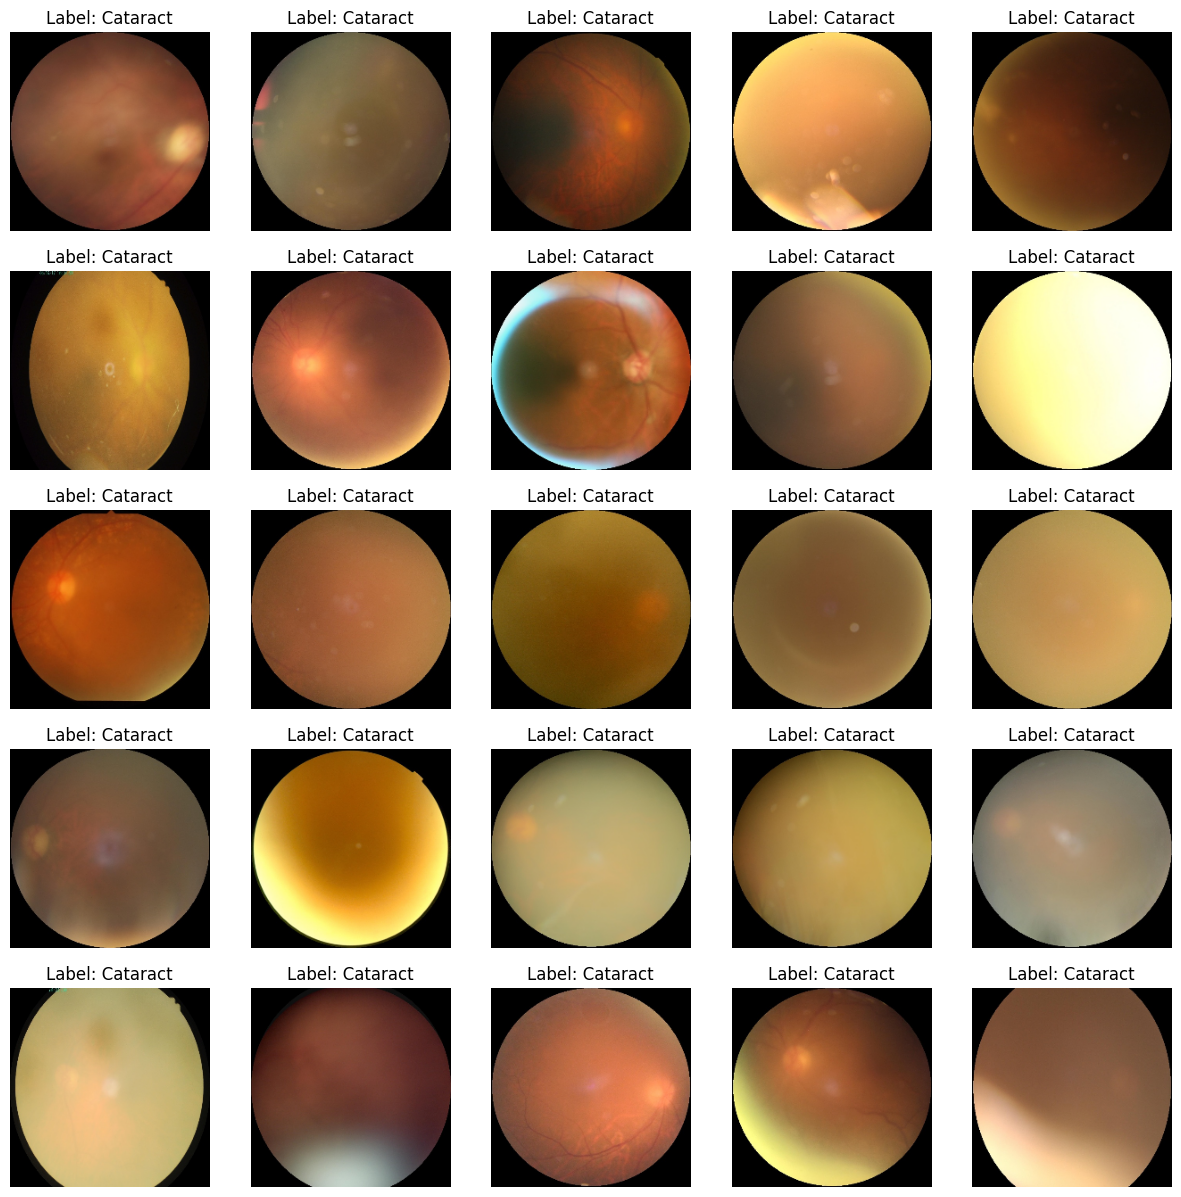

In [77]:
show_images(cat_df)

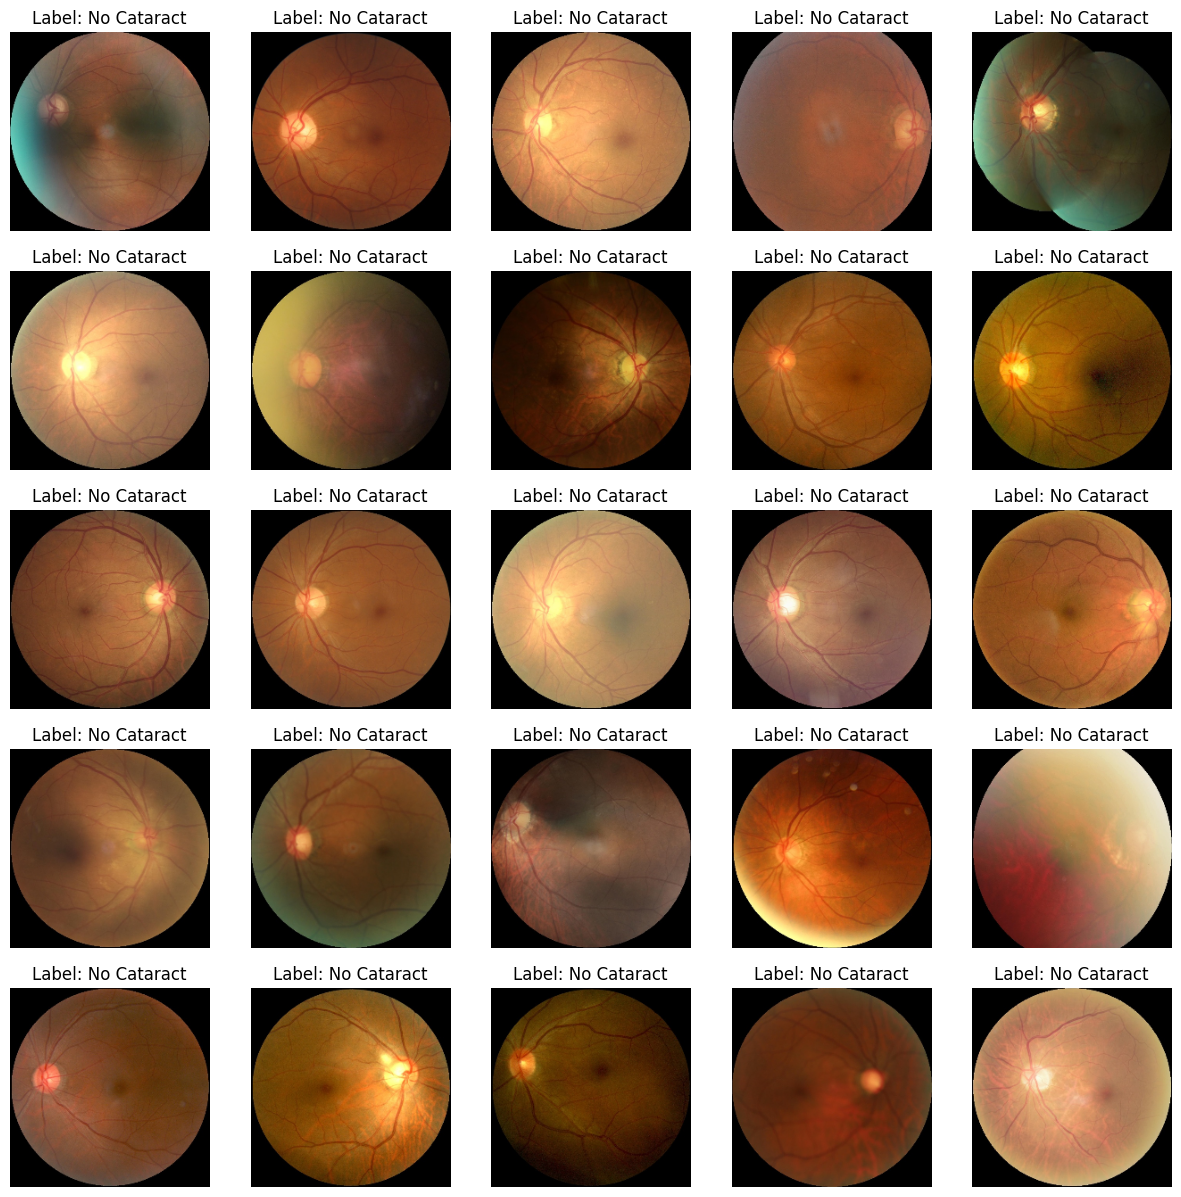

In [78]:
show_images(cat_no_df)

In [79]:
#############################

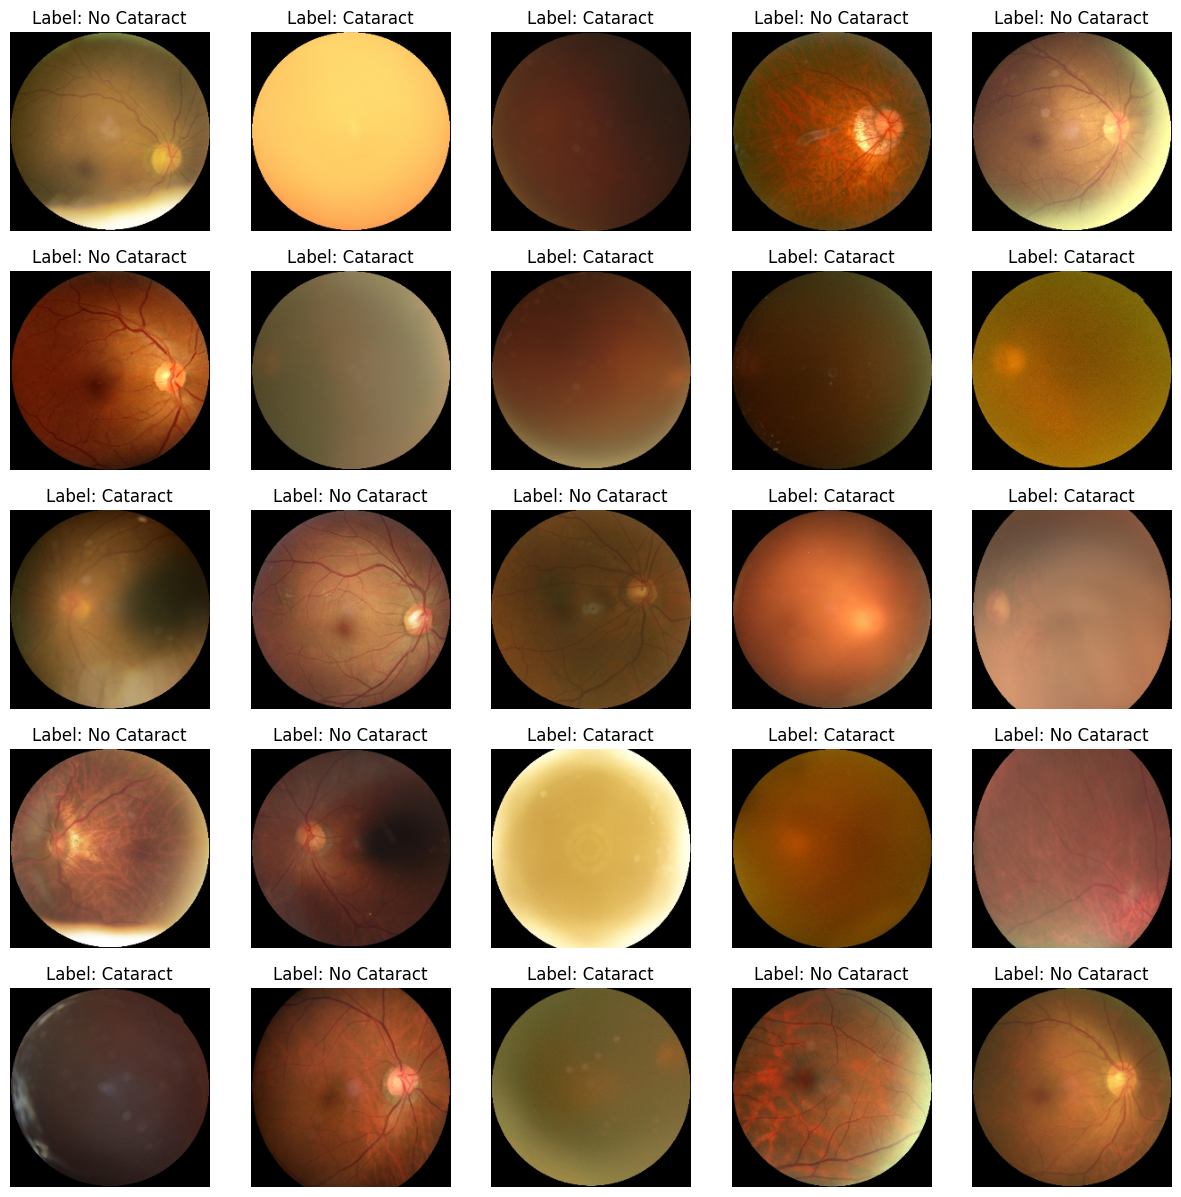

In [80]:
train = cat_df + cat_no_df
random.shuffle(train)
show_images(train)

In [81]:
def split_data(data_df, test_size=0.2, random_state=42):
    """Split dataset into training and validation sets."""
    X = [item[0] for item in data_df]
    y = [item[1] for item in data_df]

    # Stratified split to maintain label distribution
    X_train, X_val, y_train, y_val = train_test_split(
        X,
        y,
        test_size=test_size,
        random_state=random_state,
        stratify=y  # Use stratification if labels are imbalanced
    )

    return (X_train, X_val), (y_train, y_val)

In [82]:
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split

def split_data(data_df, test_size=0.2, val_size=0.2, random_state=42):
    """Split dataset into training, validation, and test sets."""
    # Convert the data tuple to a list for shuffling purposes if needed.
    X = [item[0] for item in data_df]
    y = [item[1] for item in data_df]

    # class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)

    # First split: train and temporary
    X_train, X_temp, y_train, y_temp = train_test_split(
        X,
        y,
        test_size=(1 - (test_size+val_size)),
        random_state=random_state,
        stratify=y
    )

    # Second split: validation from the temporary set
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp,
        y_temp,
        test_size=(val_size / (test_size + val_size)),  
        random_state=random_state,
        stratify=None
    )

    # Now create DataFrames and save them
    df_train = pd.DataFrame({
        'image': [item[0] for item in X_train],
        'label': y_train
    })

    df_val = pd.DataFrame({
        'image': [item[0] for item in X_val],
        'label': y_val
    })

    df_test = pd.DataFrame({
        'image': [item[0] for item in X_test],
        'label': y_test
    })

    # Save the DataFrames to files
    df_train.to_csv('train_data.csv', index=False)
    df_val.to_csv('val_data.csv', index=False)
    df_test.to_csv('test_data.csv', index=False)

    return X_train, y_train, X_test, y_test,X_val, y_val

In [83]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y = np.array([i[1] for i in train])
print(X.shape)
print(y.shape)

(820, 224, 224, 3)
(820, 2)


In [93]:
data_list = [(X[i], y[i]) for i in range(len(train))]
train_images, train_labels, test_images, test_labels,val_images, val_labels = split_data(train)

In [94]:
# print(len(X_train), len(X_test), len(X_val))

In [95]:
import torch
from torchvision import models
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd

In [96]:
import torch

if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS is available. Device:", mps_device)
else:
    if not torch.backends.mps.is_built():
        print("MPS not available because PyTorch was not built with MPS enabled.")
    else:
        print("MPS not available. Check if you're using macOS 12.3+ and have an MPS-enabled device.")


MPS is available. Device: mps


In [97]:
# class ImageDataset(Dataset):
#     def __init__(self, image_paths, labels, transform=None):
#         self.image_paths = image_paths
#         self.labels = labels
#         self.transform = transform

#     def __len__(self):
#         return len(self.image_paths)

#     def __getitem__(self, idx):
#         if self.transform:
#             image = Image.open(self.image_paths[idx]).convert('RGB')
#             image = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])(image)
#             return {
#                 'image': torch.from_numpy(image).float().to(device),
#                 'label': torch.tensor(self.labels[idx], dtype=torch.long).to(device)
#             }
#         else:
#             image = Image.open(self.image_paths[idx]).convert('RGB')
#             image = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])(image)
#             return {
#                 'image': torch.from_numpy(image).float().to(device),
#                 'label': torch.tensor(self.labels[idx], dtype=torch.long).to(device)
#             }

In [107]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np
from PIL import Image

class ImageDataset(Dataset):
    def __init__(self, images, labels, transform=None, device='cpu'):
        self.images = images
        self.labels = labels
        self.transform = transform
        self.device = device

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        # Convert numpy array to PIL Image
        image = Image.fromarray(image)

        if self.transform:
            image = self.transform(image)
        else:
            image = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
            ])(image)

        return {
            'image': image.to(self.device),
            'label': torch.tensor(label, dtype=torch.long).to(self.device)
        }


In [108]:
# X_train, y_train, X_test, y_test,X_val, y_val


# train_dataset = ImageDataset(X_train, y_train, device=device)
# test_dataset = ImageDataset(X_test, y_test, device=device)
# cal_dataset = ImageDataset(X_val, y_val, device=device)

In [109]:
model = models.mobilenet_v2(weights='IMAGENET1K_V1')

# Freeze all layers except the last one
for param in model.parameters():
    param.requires_grad = False

# Modify the classifier for binary classification
num_ftrs = model.classifier[1].in_features
model.classifier[1] = torch.nn.Linear(num_ftrs, 2)

# Move model to device
model = model.to(device)

# Training setup
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier[1].parameters(), lr=1e-4)

# Create datasets and dataloaders
train_dataset = ImageDataset(train_images, train_labels, transform=transform)
val_dataset = ImageDataset(val_images, val_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        inputs, labels = batch['image'], batch['label']
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs, labels = batch['image'], batch['label']
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Validation Accuracy: {accuracy:.4f}")

print("Training completed")

# Final evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch in val_loader:
        inputs, labels = batch['image'], batch['label']
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

final_accuracy = correct / total
print(f"Final Validation Accuracy: {final_accuracy:.4f}")

RuntimeError: Mismatched Tensor types in NNPack convolutionOutput

In [ ]:
# ## Diabetes

# print(df_metadata[df_metadata.diabetes==1]['r_diagnostic_keywords'].value_counts())
# print(df_metadata[(df_metadata.r_diagnostic_keywords.str.contains('proliferative')) & (df_metadata.filename.str.contains('right')) & (~df_metadata.labels.str.contains('D'))])

In [ ]:
# df_metadata = parse_df_keywords(df_metadata, condition='diabetes',query='proliferative')
# df_metadata        

In [ ]:
# ## Glaucoma

# print(df_metadata[df_metadata.glaucoma==1]['r_diagnostic_keywords'].value_counts())
# print(df_metadata[(df_metadata.r_diagnostic_keywords.str.contains('glaucoma')) & (df_metadata.filename.str.contains('right')) & (~df_metadata.labels.str.contains('G'))])




In [ ]:
# df_metadata = parse_df_keywords(df_metadata, condition='glaucoma',query='proliferative')
# df_metadata   

In [ ]:
# filtered_df = df_metadata[df_metadata.filename.isin(['0_left.jpg', '0_right.jpg'])]   
# filtered_df

In [ ]:
# 'right' in df_metadata[(df_metadata.le_cataract==1) & (1)].iloc[0].filename

In [ ]:
# df_metadata[(df_metadata.le_cataract==1) & (df_metadata.filename.str.contains('left')) & (~df_metadata.labels.str.contains('C'))]

In [ ]:
# df_metadata[(df_metadata.re_cataract==1) & (df_metadata.filename.str.contains('right')) & (~df_metadata.labels.str.contains('C'))]